# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls



## Functions

In [2]:
def isNumpyFloat(x):
    return True if str(type(x)) == "<class 'numpy.float64'>" else False

In [3]:
def isZeroOrOne(x):
    return True if (getRandomZeroOrOne() == 0 or getRandomZeroOrOne() == 1) else 0

In [4]:
def runTest():
    """Run testing function"""
    #Create error Dictionary for storage information about test steps.
    errorDict = {}
    
    #Test getRandom
    try: errorDict["getRandom"] = isNumpyFloat(getRandom())
    except: errorDict["getRandom"] = 0
        
    #Test getRandomZeroOrOne
    try: errorDict["getRandomZeroOrOne"] = isZeroOrOne(getRandomZeroOrOne())
    except: errorDict["getRandomZeroOrOne"] = 0
    
    #Transofm Dictionary into DataFrameObject
    data = {'TestName':list(errorDict.keys()),'TestResult':list(errorDict.values())}
    df = pd.DataFrame(data)
    
    return "Sucness" if all(errorDict.values()) else "Error: " + str(list(df.TestName[df.TestResult == 0]))

In [5]:
runTest()

"Error: ['getRandom', 'getRandomZeroOrOne']"

In [6]:
def getRandom(precision = 1):
    """Return random from 0 to 1, with given precision precision"""
    return np.round(np.random.rand(),1)*1.0

In [7]:
def getRandomZeroOrOne():
    """Return in random order 0 or 1"""
    return 1 if getRandom() <= 0.5 else 0

In [8]:
def getRandomMathFunctionGenerator():
    """Return random math funcion sin or cos"""
    return np.sin if getRandomZeroOrOne() else np.cos

In [9]:
def genearateNewSignal(minLenghtOfSignal = 0, maxLenghtOfSignal = 4, noiseSize = 0.2):
    lenghtOfSignal = np.arange(minLenghtOfSignal, maxLenghtOfSignal*np.pi, 0.1) #[i for i in range(minLenghtOfSignal, maxLenghtOfSignal)]
    
    mathFunction = getRandomMathFunctionGenerator()
    resultOfMathOperation = list(map(mathFunction, lenghtOfSignal))
    
    noise = np.random.normal(0, noiseSize, len(resultOfMathOperation))
    resultOfMathOperation = resultOfMathOperation +  noise
    
    
    
    return list(lenghtOfSignal), resultOfMathOperation, 'sin' if str(mathFunction) == "<ufunc 'sin'>" else 'cos'

In [10]:
a, b, c = genearateNewSignal(maxLenghtOfSignal = 16, noiseSize=0.2)

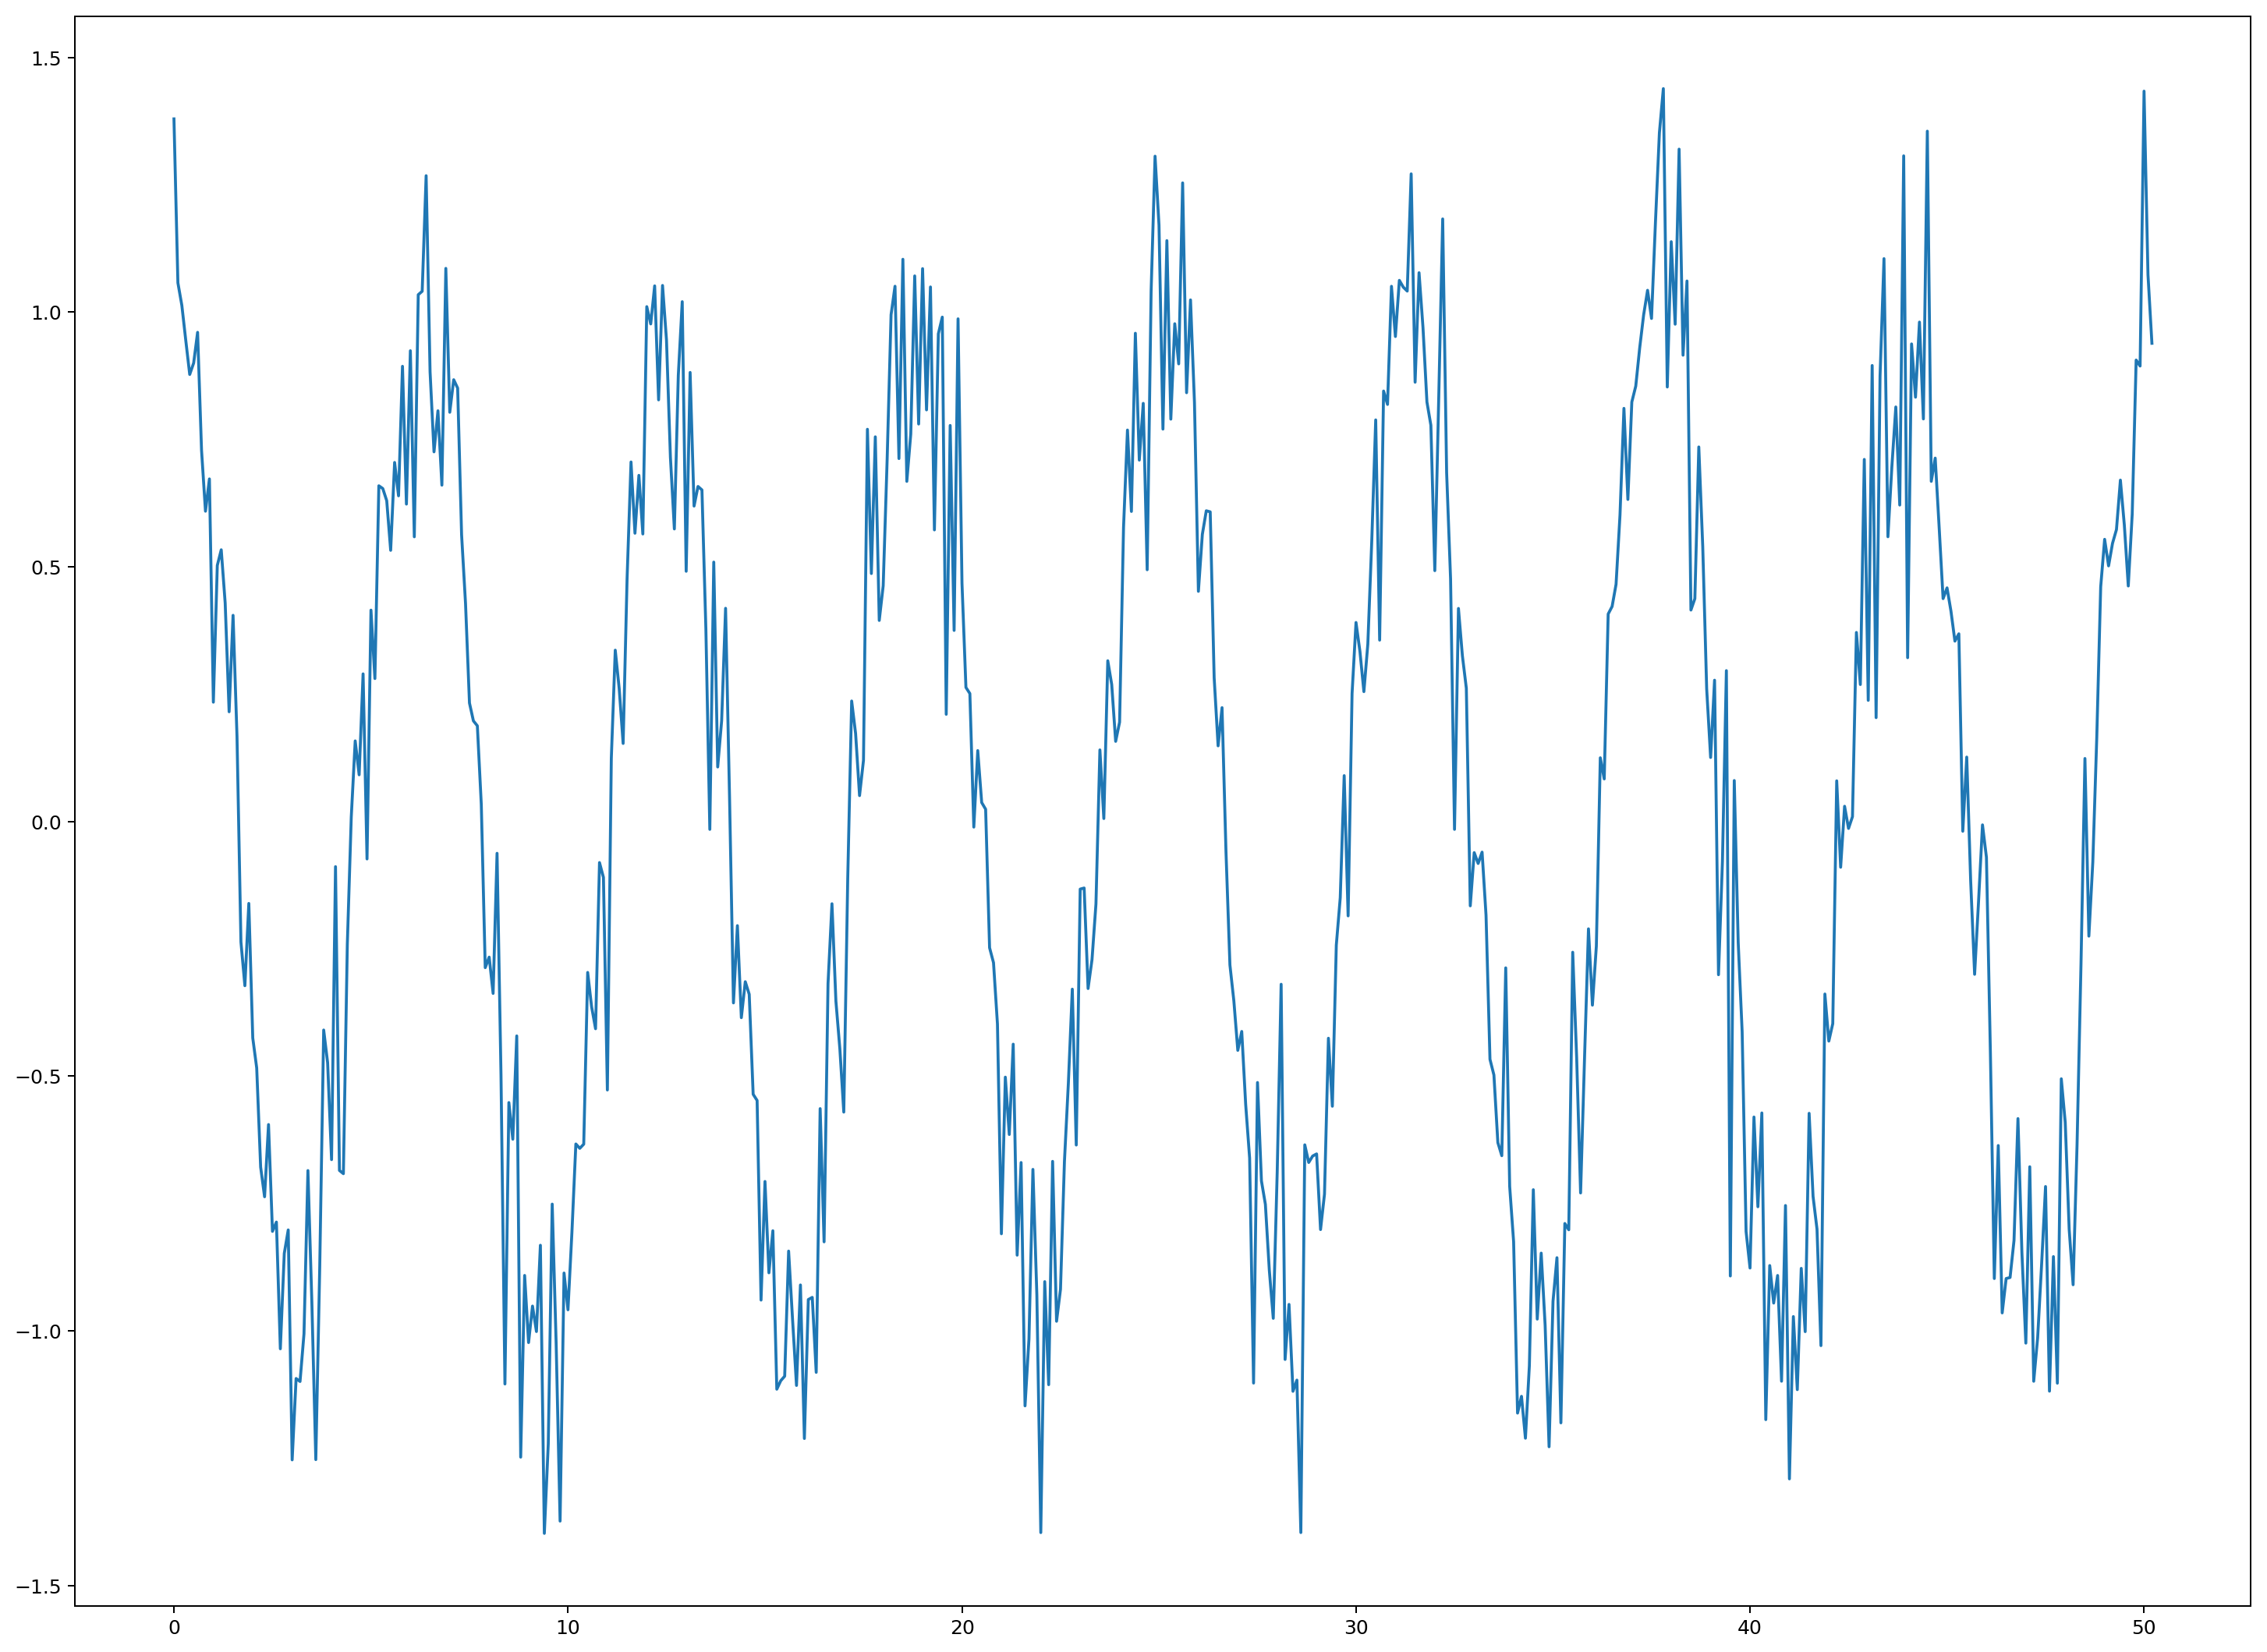

In [11]:
plt.figure(num=None, figsize=(20, 15), dpi=180, facecolor='w', edgecolor='k')
plt.plot(a,b);